# 2-1. Îì§Ïñ¥Í∞ÄÎ©∞

### Ïã§ÏäµÎ™©Ìëú
---
1. ÏßÅÏ†ë ResNet Íµ¨ÌòÑÌïòÍ∏∞
2. Î™®Îç∏ÏùÑ configÏóê Îî∞ÎùºÏÑú Î≥ÄÍ≤ΩÍ∞ÄÎä•ÌïòÎèÑÎ°ù ÎßåÎì§Í∏∞
3. ÏßÅÏ†ë Ïã§ÌóòÌï¥ÏÑú ÏÑ±Îä• ÎπÑÍµêÌïòÍ∏∞


### ÌïôÏäµÎÇ¥Ïö©
---
1. Ablation Study
2. Back to the 2015
3. Block
4. Complete Model
5. Experiment

$ pip install tensorflow-datasets

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
# TensorflowÍ∞Ä ÌôúÏö©Ìï† GPUÍ∞Ä Ïû•Ï∞©ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

CIFAR-10ÏùÄ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎãàÏßÄÎßå Í∑∏ÎûòÎèÑ Î°úÎìúÎêòÎäî Îç∞ ÍΩ§ Í∏¥ ÏãúÍ∞ÑÏù¥ Í±∏Î¶ΩÎãàÎã§. Ïû†Íπê Ïª§ÌîºÎ•º ÎìúÏãúÎ©¥ÏÑú Ïà®ÏùÑ ÎèåÎ¶¨ÏÖîÎèÑ Ï¢ãÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï§ÄÎπÑÎêòÎ©¥ ÌÅ¥ÎûòÏä§Ïùò ÏàòÏôÄ ÌÅ¥ÎûòÏä§Ïóê Îî∞Î•∏ Ïù¥Î¶ÑÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§. **DatasetBuilder**Ïùò **info**Î•º ÌÜµÌï¥ Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.

>‚ùóÔ∏è tfds.load()Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ~/tensorflow_datasets Í≤ΩÎ°úÏóê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞Í∞Ä Ïª§ÏÑú ÌïòÎÇòÏùò Ìè¥ÎçîÏóê Î™®ÏïÑÎÜìÍ≥† ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÎèÑ Ï¢ãÏùÄ Î∞©Î≤ïÏù¥ÎØÄÎ°ú, ~/aiffel ÌîÑÎ°úÏ†ùÌä∏ Ìè¥ÎçîÍ∞Ä ÏïÑÎãå Í∏∞Î≥∏ Í≤ΩÎ°úÏóê Îã§Ïö¥ Î∞õÏïÑ ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§. ÌòπÏãú Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ•º Î∞îÍæ∏Í≥† Ïã∂ÏúºÏãúÎã§Î©¥, data_dir Ïù∏ÏûêÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

In [3]:
import urllib3
urllib3.disable_warnings()

dataset_name = 'cats_vs_dogs'
ds_train, ds_info_train = tfds.load(name=dataset_name, split='train[:80%]', as_supervised=True, with_info=True)
ds_valid, ds_info_valid = tfds.load(name=dataset_name, split='train[80%:]', as_supervised=True, with_info=True)

In [4]:
# Tensorflow Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÎ©¥ Íº≠ feature Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî. 
print(ds_info_train.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


TensorflowÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ NumpyÍ∞Ä ÏïÑÎãàÎØÄÎ°ú **ds_train.shape** Í∞ôÏùÄ Í≤å Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. ÏúÑÏôÄ Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïù¥ÎØ∏ÏßÄ shapeÏôÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàò, ÎùºÎ≤® ÌÅ¥ÎûòÏä§Ïùò Í∞ØÏàò Îì± Í∞ÄÏû• Ï§ëÏöîÌïú Ï†ïÎ≥¥Îì§Ïù¥ Ïûò ÌôïÏù∏ÎêòÏóàÎÇòÏöî?

### 2) Input Normalization
---
- [Îî•Îü¨Îãù Ïö©Ïñ¥ Ï†ïÎ¶¨, Normalization(Ï†ïÍ∑úÌôî) ÏÑ§Î™Ö](https://light-tree.tistory.com/132)

Ïö∞Î¶¨Îäî "Í∞ÄÎ°ú 1920, ÏÑ∏Î°ú 1080 ÌîΩÏÖÄÏùò Ïù¥ÎØ∏ÏßÄ"Ï≤òÎüº ÌîΩÏÖÄÏùò ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÎßêÌï† Ïàò ÏûàÎäîÎç∞Ïöî. Ïù¥Îïå Ìïú ÌîΩÏÖÄÏù¥ Í∞ÄÏßÑ Ï±ÑÎÑê(channel) Í∞íÏùÄ ÌîΩÏÖÄÏùò ÏÉâÏùÑ ÌëúÌòÑÌï©ÎãàÎã§. RGBÎäî Red, Green, BlueÎ°ú ÏÑ∏ Í∞ÄÏßÄ ÏÉâÏùÑ Ï°∞Ìï©Ìï¥ÏÑú Ïö∞Î¶¨Í∞Ä Î≥¥Îäî Îã§ÏñëÌïú ÏÉâÏùÑ ÎßåÎì§Ïñ¥ÎÇ¥Îäî Î∞©Î≤ïÏù¥Ï£†. Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùº(gray scale)ÏùÄ Îã®ÏàúÌïòÍ≤å ÌùëÍ≥º Î∞±ÎßåÏùÑ ÌëúÌòÑÌïòÎäî ÌïòÎÇòÏùò Ï±ÑÎÑêÏùÑ Í∞ÄÏßÑ Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§. RGBÎÇò Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùº Ïô∏ÏóêÎèÑ HSV, CMYK Îì± Ïù∏ÏáÑ ÎòêÎäî Ïù¥ÎØ∏ÏßÄ ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî Îã§ÏñëÌïú Ï±ÑÎÑê Ï≤¥Í≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§.

Ïö∞Î¶¨Ïùò Î™®Îç∏Ïóê ÎÑ£Ïñ¥Ï£ºÍ∏∞ Ï†ÑÏóêÎäî Í∞Å Ï±ÑÎÑêÎ≥Ñ ÏµúÎåìÍ∞íÏù∏ 255Î°ú **Ï†ïÍ∑úÌôî(normalize)**Î•º Ìï¥Ï£ºÏñ¥ Ïù¥ÎØ∏ÏßÄÏùò ÌëúÌòÑÏù¥ 0Í≥º 1 ÏÇ¨Ïù¥Î°ú Îì§Ïñ¥Ïò§ÎèÑÎ°ù ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [5]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

In [6]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

# 2-7. ÌîÑÎ°úÏ†ùÌä∏: ResNet Ablation Study
### 1) ResNet Í∏∞Î≥∏ Î∏îÎ°ù Íµ¨ÏÑ±ÌïòÍ∏∞
---
Ïù¥Ï†ú Ïã§Ï†ÑÏúºÎ°ú ÎèåÏïÑÏôÄÏÑú **ResNet-34**ÏôÄ **ResNet-50** ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏßÅÏ†ë ÎßåÎì†Îã§Í≥† ÏÉùÍ∞ÅÌï¥Î¥ÖÏãúÎã§. Ïö∞ÏÑ† ResNet-34ÏôÄ ResNet-50ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Î∏îÎ°ùÏùò Í≥µÌÜµÏ†êÏùÑ Ï∞æÍ≥† Ï∞®Ïù¥Ï†êÏùÑ Ï∞æÏïÑÎ¥ÖÏãúÎã§.

[Deep Residual Learning for Image Recognition(paper)](https://arxiv.org/pdf/1512.03385.pdf)

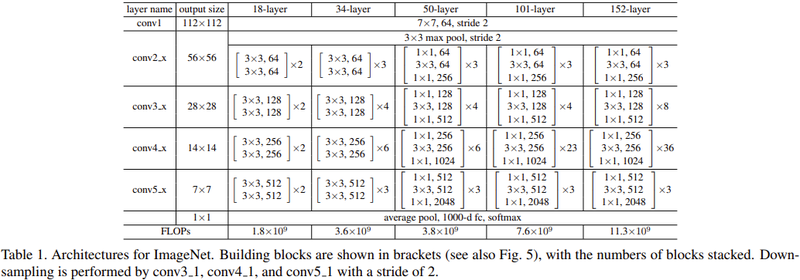

> **Q1. ResNetÎÖºÎ¨∏Ïóê ÏÜåÍ∞úÎêú ÏúÑ ÌëúÏóêÏÑú, ResNet 34ÏôÄ 50ÏóêÏÑú ÏÇ¨Ïö©Îêú Î∏îÎ°ùÎì§Ïùò Í≥µÌÜµÏ†êÍ≥º Ï∞®Ïù¥Ï†êÏùÑ ÎπÑÍµêÌï¥Î≥¥Í≥† Í∑∏ ÌäπÏßïÏùÑ Ï†ïÎ¶¨Ìï¥Î¥ÖÏãúÎã§.**

> ResNet-34ÏôÄ ResNet-50ÏùÄ Î™®Îëê conv blockÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Î∏îÎ°ù Íµ¨Ï°∞Î•º Í∞ÅÍ∞Å 3, 4, 6, 3Í∞úÏî© Î∞òÎ≥µÌï¥ÏÑú ÏåìÏùÄ ÌòïÌÉúÎùºÎäî Í≥µÌÜµÏ†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. 
Í∑∏Îü¨ÎÇò ResNet-34ÏôÄ ResNet-50Ïùò Î∏îÎ°ù ÎÇ¥Î∂Ä Íµ¨ÏÑ±ÏùÄ ÏïΩÍ∞Ñ Îã§Î¶ÖÎãàÎã§. ResNet-34Ïùò Í≤ΩÏö∞ BlockÏùÄ 3x3 kernelÏù∏ Convolution layerÎ°úÎßå Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÏßÄÎßå, ResNet-50ÏùÄ 1x1 ConvolutionÏù¥ ÏïûÎí§Î°ú Î∂ôÏñ¥ Îçî ÎßéÏùÄ Î†àÏù¥Ïñ¥Î•º Ìïú Î∏îÎ°ù ÎÇ¥Ïóê Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§.

ÏúÑÏùò ÌÄ¥Ï¶àÏùò ÎãµÏùÑ Ïñ¥Îäê Ï†ïÎèÑ Ïä§Ïä§Î°ú Ï∞æÏïÑÎÇ¥ÏÖ®Îã§Î©¥ ResNetÏùò Í∏∞Î≥∏ Î∏îÎ°ù, ÎòêÎäî Residual Î∏îÎ°ù(residual block)Ïù¥ Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥Ïïº Ìï†ÏßÄ Í∞êÏù¥ Ïò§ÏÖ®ÏùÑ Í≤ÉÏûÖÎãàÎã§. Learning by Doing Ïù¥ÎùºÍ≥† ÌïòÏ£†! Ïù¥Î≤àÏóêÎäî ResNetÏùò Î∏îÎ°ùÏùÑ ÏßÅÏ†ë ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§! ÌòπÏãúÎÇò Î™®Îç∏ ÎÇ¥Ïùò ÏïûÍ≥º Îí§ÏóêÏÑú Î∞òÎ≥µÎêòÏßÄ ÏïäÏùÑ Í≤É Í∞ôÏùÄ Î∂ÄÎ∂ÑÏùÄ Ìï®ÏàòÎ°ú Íµ¨ÌòÑÌïòÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§.

Ïö∞Î¶¨Í∞Ä ÏßÄÍ∏à ÎßåÎì§Ïñ¥Ïïº ÌïòÎäî Í≤ÉÏùÄ Î∏îÎ°ùÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. Ï≤òÏùåÏù¥Îùº ÎÑàÎ¨¥ ÎßâÏó∞ÌïòÏã§ Ïàò ÏûàÍ≤†ÏßÄÎßå Ïó¨Îü¨Î∂ÑÎì§ÏùÄ Ïù¥ÎØ∏ Î™áÎ≤àÏùò Í≤ΩÌóòÏù¥ ÏûàÏäµÎãàÎã§.
ÏùºÎã®ÏùÄ VGGÏóêÏÑúÎèÑ Î∏îÎ°ùÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§ÏóàÏäµÎãàÎã§. ResNetÏù¥Îùº ÌïòÎçîÎùºÎèÑ ÏïÑÏù¥ÎîîÏñ¥Ïùò Í∏∞Î≥∏ ÏõêÎ¶¨Îäî Îã§Î•¥ÏßÄ ÏïäÏäµÎãàÎã§.

Í∑∏Î¶¨Í≥†, Ïó¨Îü¨Î∂ÑÎì§ÏùÄ ÏïÑÎßà Ïù¥Ï†ÑÏóê VGG-16Ïù¥ÎÇò ResNet-50 Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ÏÑú ÌõàÎ†®ÍπåÏßÄ ÏãúÏºúÎ≥∏ Í≤ΩÌóòÎì§Ïù¥ ÏûàÏúºÏã§ Í≤ÉÏûÖÎãàÎã§. ÏΩîÎìúÎ•º Ïä§Ïä§Î°ú Íµ¨ÌòÑÌïú Í≤ÉÏù¥ ÏïÑÎãàÎùº Í≥µÍ∞úÎêú Ïò§ÌîàÏÜåÏä§Î•º ÌôúÏö©Ìï¥ÏÑú Îπ†Î•¥Í≤å Íµ¨ÏÑ±ÌñàÍ≤†ÏßÄÎßå, Î∏îÎ°ù ÏÉùÏÑ± Ìï®ÏàòÍ∞Ä Ïñ¥Îñ§ ÌòïÌÉúÎ°ú ÎßåÎì§Ïñ¥ÏßÄÎäîÏßÄÎ•º Ïù¥ÎØ∏ Í≤ΩÌóòÌï¥ Î≥¥Ïã† Î∞î ÏûàÏùÑ ÌÖåÎãà Í∑∏Í≤ÉÏùÑ Ï∞∏Í≥†ÌïòÏÖîÎèÑ ÎèÑÏõÄÏù¥ Îê† Í≤ÉÏûÖÎãàÎã§.

ÌïòÏßÄÎßå Ïù¥Î≤à Îã®Í≥ÑÏóêÏÑúÎäî Í∞ÄÍ∏âÏ†Å ResNet ÎÖºÎ¨∏ÏùÑ ÌÜµÌï¥ÏÑú Íµ¨ÌòÑÎ∞©Î≤ïÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏñªÏúºÏãúÍ∏∞Î•º Í∂åÌï©ÎãàÎã§. ÎÖºÎ¨∏Îßå Î≥¥Í≥† Ïä§Ïä§Î°ú Íµ¨ÌòÑÌï¥ Î≥¥Îäî Í≤ΩÌóòÏùÑ ÌÜµÌï¥ Îî•Îü¨Îãù Í∞úÎ∞úÏûêÎ°úÏÑúÏùò ÎÇ¥Í≥µÍ≥º ÏûêÏã†Í∞êÏù¥ Îã§Ï†∏ÏßÄÍ≤å Îê† Í≤ÉÏûÖÎãàÎã§.

### 2) ResNet-34, ResNet-50 Complete Model
---
#### ResNet-34
VGGÏôÄ Í∞ôÏù¥ Î∏îÎ°ùÏùÑ ÎßåÎìúÎäî Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÏßÅÏ†ë Ï†ÑÏ≤¥ Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§. ResNet-34ÏôÄ ResNet-50Ïùò Ï∞®Ïù¥Ïóê Îî∞Îùº Îã¨ÎùºÏßÄÎäî Íµ¨ÏÑ±(configuration)ÏùÑ Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï¥ÏÑú Í∞ôÏùÄ ÏÉùÏÑ± Ìï®Ïàò `build_resnet()`Î•º ÌÜµÌï¥ÏÑú ResNetÏùò Ïó¨Îü¨Í∞ÄÏßÄ Î≤ÑÏ†ÑÎì§ÏùÑ Î™®Îëê ÎßåÎì§Ïñ¥ ÎÇº Ïàò ÏûàÎèÑÎ°ù Ìï¥Ïïº Ìï©ÎãàÎã§.

Îã§ÏùåÏùò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ©¥,


***

# Ïó¨Í∏∞Î∂ÄÌÑ∞ ÌîÑÎ°úÏ†ùÌä∏ ÏãúÏûë

### Ï≤´ Î≤àÏß∏ Í≥µÌÜµ Î†àÏù¥Ïñ¥: 7*7 conv2d -> BN -> Relu -> MaxPooling

In [7]:
# Ï≤´ Î≤àÏß∏ Í≥µÌÜµ Î†àÏù¥Ïñ¥: 7*7 conv2d -> BN -> Relu -> MaxPooling
def conv1(x): 
    # Conv2D
    x = keras.layers.Conv2D(
        filters=64,
        kernel_size=(7,7),
        strides=(2,2),
        kernel_initializer='he_normal',
        padding='same', name='conv2d_7x7'
    )(x)

    # Batch Normalization 
    x = tf.keras.layers.BatchNormalization()(x)

    # Activation
    x = tf.keras.layers.Activation('relu')(x)

    # maxpooling
    x = keras.layers.MaxPooling2D(
             pool_size=(2, 2),
             strides=2,
             name='stage2_0_maxpooling'
            )(x)
    
    return x

### Residual ÌÜµÍ≥º(layer-18,34): 1\*1 conv2d stride2 -> BN

In [8]:
# residual ÌÜµÍ≥º(layer-18,34): 1*1 conv2d stride2 -> BN
def conv_short(x,filters,stage_num,block_num):
    
    # Conv2D
    x = keras.layers.Conv2D(
        filters=filters,
        kernel_size=(1,1),
        kernel_initializer='he_normal',
        padding='same', strides=(2,2),
        name=f'stage{stage_num}_{block_num+1}_short'
    )(x)
    
    # Batch Normalization 
    x = tf.keras.layers.BatchNormalization()(x)
    
    return x

### Residual ÌÜµÍ≥º(layer-50,101,152): 1\*1 conv2d stride1 -> BN

In [9]:
# residual ÌÜµÍ≥º(layer-50,101,152): 1*1 conv2d stride1 -> BN
def conv_short50(x,filters, stage_num, block_num):
    
    # Conv2D
    x = keras.layers.Conv2D(
        filters=filters,
        kernel_size=(1,1),
        kernel_initializer='he_normal',
        padding='same', strides=(1,1), 
        name=f'stage{stage_num}_{block_num+1}_short'
    )(x)
    
    # Batch Normalization 
    x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn4')(x)
    
    return x

### conv2_x ÏÉùÏÑ± Ìï®Ïàò

In [10]:
# conv2_x Î∏îÎü≠

def conv_master1(x,
                 first_layer,
                 block_num,
                 kernel_size,
                 filters,
                 stage_num,
                 num_layer=34,
                 is_plain=False
                 ):
    """
    conv2
    1) layer-18: [[3*3],64, [3*3],64]*2
    2) layer-34: [[3*3],64, [3*3],64]*3
    3) layer-50: [[1*1],64, [3*3],64, [1*1],256]
    """
    
    # residual Ï†ïÏùò
    residual = x
    
    if num_layer == 18 or num_layer == 34:
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            kernel_initializer='he_normal',
            padding='same', name=f'stage{stage_num}_{block_num+1}_conv1'
        )(x)

        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn1')(x)

        # Activation
        x = tf.keras.layers.Activation('relu')(x)

        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            kernel_initializer='he_normal',
            padding='same', name=f'stage{stage_num}_{block_num+1}_conv2'
        )(x)

        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn2')(x)
        
        if not is_plain:
            # add
            x = tf.keras.layers.Add(name=f'stage{stage_num}_{block_num+1}_add')([x, residual])

        # activation
        x = tf.keras.layers.Activation('relu')(x)
        
    else:
        # 3Í∞ú Ï∏µ Ï§ëÏóêÏÑú Ï≤´Î≤àÏß∏ Ï∏µÎßå shortcutÏù¥Í≥† ÎÇòÎ®∏ÏßÄ Îëê Í∞úÎäî ÏûÖÎ†•Í∞íÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
        
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size[0],
            kernel_initializer='he_normal',
            padding='same', name=f'stage{stage_num}_{block_num+1}_conv1'
        )(x)
        
        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn1')(x)

        # Activation
        x = tf.keras.layers.Activation('relu')(x)
        
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size[1],
            kernel_initializer='he_normal', name=f'stage{stage_num}_{block_num+1}_conv2',
            padding='same'
        )(x)

        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn2')(x)

        # Activation
        x = tf.keras.layers.Activation('relu')(x)

        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters*4, # ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Îäî 4Î∞∞Ïù¥Îã§.
            kernel_size=kernel_size[2],
            kernel_initializer='he_normal', name=f'stage{stage_num}_{block_num+1}_conv3',
            padding='same'
        )(x)
        
        # short
        conv3_short = conv_short50(residual, filters=filters*4, stage_num=stage_num, block_num=block_num)
        
        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn3')(x)
        
        if not is_plain:
            if first_layer:
                # add
                x = tf.keras.layers.Add(name=f'stage{stage_num}_{block_num+1}_add')([x, conv3_short])
            else:
                # add
                x = tf.keras.layers.Add(name=f'stage{stage_num}_{block_num+1}_add')([x, residual])
            
        # activation
        x = tf.keras.layers.Activation('relu')(x)
        
    return x

### conv3_x ~ conv5_x Î∏îÎü≠ ÏÉùÏÑ±Ìï† Ïàò ÏûàÎäî Ìï®Ïàò

In [11]:
# conv3_x ~ conv5_x Î∏îÎü≠
def conv_master2(x,
                 block_num,
                 kernel_size,
                 filters,
                 first_layer, # True/False,
                 stage_num,
                 num_layer=34,
                 is_plain=False
                 ):
    
    residual = x
    
    # kernel_size_copy
    if num_layer == 50 or num_layer == 101 or num_layer == 152:
        kernel_size_copy = kernel_size.copy()
        kernel_size = kernel_size_copy[0]
        
    # <!-- first block --!>    
    # Ï≤´ Î≤àÏû¨ Ï∏µÏùÄ strideÎ•º Ìï¥Ïïº Ìï®.
    if first_layer:
        
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            kernel_initializer='he_normal',
            padding='same', strides=(2,2), # stride
            name=f'stage{stage_num}_{block_num+1}_conv1'
        )(x)
    
    else:
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            kernel_initializer='he_normal',
            padding='same',
            name=f'stage{stage_num}_{block_num+1}_conv1'
        )(x)
    
    # Batch Normalization 
    x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn1')(x)

    # Activation
    x = tf.keras.layers.Activation('relu')(x)

    if num_layer==50 or num_layer==101 or num_layer==152: 
        # <!-- second block --!>
        kernel_size = kernel_size_copy[1]
#         print(f'stage{stage_num}_{block_num+1}_conv2')
#         print('kernel_size: ', kernel_size)
        # Conv2D
        x = keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            kernel_initializer='he_normal',name=f'stage{stage_num}_{block_num+1}_conv2',
            padding='same'
        )(x)

        # Batch Normalization 
        x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn2')(x)

        # Activation
        x = tf.keras.layers.Activation('relu')(x)
    
    
    # <!-- third block --!>
#     print(f'stage{stage_num}_{block_num+1}_conv2')
#     print('kernel_size: ', kernel_size)
    conv_num=3
    if num_layer==50 or num_layer==101 or num_layer==152:
        filters=filters*4
        kernel_size = kernel_size_copy[2]
    else: conv_num-=1
    
    
    # Conv2D
    x = keras.layers.Conv2D(
        filters=filters,
        kernel_size=kernel_size,
        kernel_initializer='he_normal',name=f'stage{stage_num}_{block_num+1}_conv{conv_num}',
        padding='same'
    )(x)

    # short
    conv3_short = conv_short(residual, filters, stage_num=stage_num, block_num=block_num)
    conv3_short50 = conv_short50(residual, filters, stage_num=stage_num, block_num=block_num)

    # Batch Normalization 
    x = tf.keras.layers.BatchNormalization(name=f'stage{stage_num}_{block_num+1}_bn{conv_num}')(x)
    
    if not is_plain:
        if first_layer:
            # add
            x = tf.keras.layers.Add(name=f'stage{stage_num}_{block_num+1}_add')([x, conv3_short])
        else:
            # add
            x = tf.keras.layers.Add(name=f'stage{stage_num}_{block_num+1}_add')([x, residual])

    # activation
    x = tf.keras.layers.Activation('relu')(x)

    return x

### ResNet ÏÉùÏÑ± Ìï®Ïàò

In [12]:
# function for building ResNet Block

def build_resnet(input_layer, num_layer=34, is_residual=True, is_plain=False):
    
    # layerÍ∞úÏàòÏóê Îî∞Î•∏ cnnÏ∏µ Í∞úÏàò
    cnn_layer ={
                18 : [2,2,2,2], 
                34 : [3,4,6,3], 
                50 : [3,4,6,3], 
                101 : [3,4,23,3],
                152 : [3,8,36,3]
                }
    
    # layerÍ∞úÏàòÏóê Îî∞Î•∏ filter Î¶¨Ïä§Ìä∏
    filter_list = [64, 128, 256, 512]
    
    # layerÎ≥Ñ Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à
    kernel_size_dict = {18:(3,3),
                   34:(3,3),
                   50:[(1,1),(3,3),(1,1)],
                   101:[(1,1),(3,3),(1,1)],
                   152:[(1,1),(3,3),(1,1)]}
    
    # layerÎ≥Ñ Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à
    kernel_size = kernel_size_dict[num_layer]
    
    # cnnÏ∏µ Î∏îÎ°ù Í∞úÏàò Î¶¨Ïä§Ìä∏(num_cnn_list) Ìï†Îãπ
    num_cnn_list = cnn_layer[num_layer]
    
    # Ï†ÑÏ≤¥ conv Î∏îÎ°ù Í∞úÏàò
    num_conv = len(num_cnn_list)
    
    # ÏûÖÎ†• Î†àÏù¥Ïñ¥
    x = input_layer
    
    # 7*7, 64, stride2 + maxpooling
    x = conv1(x)
    
    # stage num Ï†ïÏùò
    stage_num = 2
    
    # conv_idx Ï†ïÏùò
    conv_idx=0

    # conv2_x
    
    # layer-50,101,152Îßå Ìï¥Îãπ
    first_layer = [True,False,False]
    
    for i in range(num_cnn_list[conv_idx]):
        x = conv_master1(x,
                         first_layer=first_layer[i],
                         block_num=i,
                         kernel_size=kernel_size,
                         filters=filter_list[conv_idx],
                         stage_num=stage_num,
                         num_layer=num_layer,
                         is_plain=is_plain
                         )
#     print('conv2 ÏôÑÎ£å')

    # conv3_x
    stage_num+=1
    conv_idx+=1
    if is_residual: # residual ÏûàÏùÑÎïå
        first_layer = [True]
        for _ in range(num_cnn_list[conv_idx]-1): first_layer.extend([False])
    else:          # residual ÏóÜÏùÑÎïå
        first_layer = [False]*num_cnn_list[conv_idx]
    
    for i in range(num_cnn_list[conv_idx]):
        x = conv_master2(x,
                        block_num=i,
                        kernel_size=kernel_size,
                        filters=filter_list[conv_idx],
                        first_layer=first_layer[i],
                        stage_num=stage_num,
                        num_layer=num_layer,
                        is_plain=is_plain)
        
#     print('conv3 ÏôÑÎ£å')

    # conv4_x
    stage_num+=1
    conv_idx+=1
    
    if is_residual:
        first_layer = [True]
        for _ in range(num_cnn_list[conv_idx]-1): first_layer.extend([False])
    else:
        first_layer = [False]*num_cnn_list[conv_idx]
#     print('first_layer: ',first_layer)
    for i in range(num_cnn_list[conv_idx]):
        x = conv_master2(x,
                        block_num=i,
                        kernel_size=kernel_size,
                        filters=filter_list[conv_idx],
                        first_layer=first_layer[i],
                        stage_num=stage_num,
                        num_layer=num_layer,
                        is_plain=is_plain)
#     print('conv4 ÏôÑÎ£å')
    # conv5_x
    stage_num+=1
    conv_idx+=1
    
    if is_residual:
        first_layer = [True]
        for _ in range(num_cnn_list[conv_idx]-1): first_layer.extend([False])
    else:
        first_layer = [False]*num_cnn_list[conv_idx]
    
    for i in range(num_cnn_list[conv_idx]):
        x = conv_master2(x,
                        block_num=i,
                        kernel_size=kernel_size,
                        filters=filter_list[conv_idx],
                        first_layer=first_layer[i],
                        stage_num=stage_num,
                        num_layer=num_layer,
                        is_plain=is_plain)
#     print('conv5 ÏôÑÎ£å')

    # avg pooling
    x= keras.layers.AveragePooling2D(
        pool_size=(2, 2), strides=2, padding='SAME', name='avg_pool')(x)
    
    # flatten
    x = keras.layers.Flatten(name='flatten_11')(x)
    
    # FC layer(2) --- Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îäî 'Í≥†ÏñëÏù¥', 'Í∞ú' Îëê Í∞ÄÏßÄ ÌÅ¥ÎûòÏä§Îßå ÏûàÏúºÎØÄÎ°ú Ïù¥Í±∏ ÏÇ¨Ïö©Ìï¥ÏïºÌï®.
    x = keras.layers.Dense(2,name='fc2')(x)
    
    # FC layer(10) --- ÎÖ∏ÎìúÏùò ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏Ïö©(cifar-10Ïùº ÎïåÎäî Ïù¥Í≤ÉÏùÑ ÏÇ¨Ïö©Ìï¥ÏïºÌï®) ÌôïÏù∏Ïù¥ ÎÅùÎÇú ÌõÑÏóêÎäî Îã§Ïãú Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏùå.
#     x = keras.layers.Dense(10,name='fc2')(x)
    
    return x

***
## ÏûÖÎ†• ÌÅ¨Í∏∞ (32,32,3)ÏùÑ Ïù¥Ïö©Ìï¥ summaryÎ•º ÌÜµÌï¥ Î™®Îç∏Ïù¥ Ïûò ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏
### 1) resnet 34 ÌôïÏù∏ Í≤∞Í≥º: ÏùºÏπò  
- ÏÉùÏÑ± ÌååÎùºÎØ∏ÌÑ∞ Í∞úÏàò ÏùºÏπò!  

**Total params: 21,315,338  
Trainable params: 21,298,314  
Non-trainable params: 17,024**

In [ ]:
# Î™®Îç∏ ÌôïÏù∏: resnet34 with input (32,32,3)

resnet34_input_layer_ex = keras.layers.Input(shape=(32,32,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
resnet34_block_output_ex = build_resnet(resnet34_input_layer_ex)

resnet34_ex = keras.Model(inputs=resnet34_input_layer_ex, outputs=resnet34_block_output_ex)
resnet34_ex.summary()

### 2) resnet 50 ÌôïÏù∏ Í≤∞Í≥º: ÏùºÏπò  
- ÏÉùÏÑ± ÌååÎùºÎØ∏ÌÑ∞ Í∞úÏàò ÏùºÏπò!  

**Total params: 23,608,202  
Trainable params: 23,555,082  
Non-trainable params: 53,120**

In [ ]:
# Î™®Îç∏ ÌôïÏù∏: resnet50 with input (32,32,3)

resnet50_input_layer_ex = keras.layers.Input(shape=(32,32,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
resnet50_block_output_ex = build_resnet(resnet50_input_layer_ex, num_layer=50)

resnet50_ex = keras.Model(inputs=resnet50_input_layer_ex, outputs=resnet50_block_output_ex)
resnet50_ex.summary()

## üåüÎ≤àÏô∏: ResNet-18,101,152ÎèÑ Ïûò ÎßåÎì§Ïñ¥ÏßàÍπå?
- ÎÖºÎ¨∏ÏóêÏÑúÎäî Ï¥ù Îã§ÏÑØ Ï¢ÖÎ•òÍ∞Ä ÏûàÏñ¥ÏÑú ÌïòÎÇòÏùò Ìï®ÏàòÎ°ú Íµ¨ÌòÑÎê† Ïàò ÏûàÎèÑÎ°ù ÎßåÎì§ÏóàÏùå. Ïã§Ï†úÎ°ú ÎßåÎì§Ïñ¥ÏßÄÎäîÏßÄ ÌôïÏù∏.  

1. ResNet-18

In [ ]:
# Î™®Îç∏ ÌôïÏù∏: resnet18 with input (32,32,3)

resnet18_input_layer_ex = keras.layers.Input(shape=(32,32,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
resnet18_block_output_ex = build_resnet(resnet18_input_layer_ex, num_layer=18) # num_layerÎ•º ÏûÖÎ†•ÌïòÎ©¥ ÏÉùÏÑ±ÎêúÎã§.

resnet18_ex = keras.Model(inputs=resnet18_input_layer_ex, outputs=resnet18_block_output_ex)
resnet18_ex.summary()

2. ResNet-101

In [ ]:
# Î™®Îç∏ ÌôïÏù∏: resnet101 with input (32,32,3)

resnet101_input_layer_ex = keras.layers.Input(shape=(32,32,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
resnet101_block_output_ex = build_resnet(resnet101_input_layer_ex, num_layer=101) # num_layerÎ•º ÏûÖÎ†•ÌïòÎ©¥ ÏÉùÏÑ±ÎêúÎã§.

resnet101_ex = keras.Model(inputs=resnet101_input_layer_ex, outputs=resnet101_block_output_ex)
resnet101_ex.summary()

3. ResNet-152

In [ ]:
# Î™®Îç∏ ÌôïÏù∏: resnet152 with input (32,32,3)

resnet152_input_layer_ex = keras.layers.Input(shape=(32,32,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
resnet152_block_output_ex = build_resnet(resnet152_input_layer_ex, num_layer=152) # num_layerÎ•º ÏûÖÎ†•ÌïòÎ©¥ ÏÉùÏÑ±ÎêúÎã§.

resnet152_ex = keras.Model(inputs=resnet152_input_layer_ex, outputs=resnet152_block_output_ex)
resnet152_ex.summary()

***

### Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò Î∞è ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò

In [13]:
BATCH_SIZE = 16
EPOCH = 20

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_valid = apply_normalize_on_dataset(ds_valid, batch_size=BATCH_SIZE)

## 1. ResNet-34 VS Plain-34
### 1) Plain-34
**Ïã§ÌñâÌïòÍ∏∞ Ï†Ñ `bulid_resnet`Ìï®Ïàò ÎßàÏßÄÎßâ DenseÎ•º Î≥ÄÍ≤Ω(10->2)**

In [14]:
plain34_input_layer = keras.layers.Input(shape=(224,224,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ± = (224,224,3)
plain34_block_output = build_resnet(plain34_input_layer, is_plain=True) # is_plain=True ÏÑ§Ï†ï


plain34 = keras.Model(inputs=plain34_input_layer, outputs=plain34_block_output)
plain34.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_7x7 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 56, 56, 64)        0         
_________________________________________________________________
stage2_1_conv1 (Conv2D)      (None, 56, 56, 64)        36928     
_________________________________________________________________
stage2_1_bn1 (BatchNormaliza (None, 56, 56, 64)        256   

In [15]:
# Plain-34 ÌïôÏäµ
plain34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_34 = plain34.fit(
    ds_train,
    steps_per_epoch=int(ds_info_train.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info_valid.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_valid,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 110s 79ms/step - loss: 0.7245 - accuracy: 0.5181 - val_loss: 0.6930 - val_accuracy: 0.5121
Epoch 2/20
1163/1163 [==============================] - 104s 89ms/step - loss: 0.6931 - accuracy: 0.5262 - val_loss: 0.6928 - val_accuracy: 0.5127
Epoch 3/20
1163/1163 [==============================] - 91s 78ms/step - loss: 0.6930 - accuracy: 0.5190 - val_loss: 0.6960 - val_accuracy: 0.5119
Epoch 4/20
1163/1163 [==============================] - 97s 83ms/step - loss: 0.6931 - accuracy: 0.5176 - val_loss: 0.6931 - val_accuracy: 0.5114
Epoch 5/20
1163/1163 [==============================] - 91s 78ms/step - loss: 0.6931 - accuracy: 0.5255 - val_loss: 0.6955 - val_accuracy: 0.5132
Epoch 6/20
1163/1163 [==============================] - 91s 78ms/step - loss: 0.6930 - accuracy: 0.5235 - val_loss: 0.6959 - val_accuracy: 0.5019
Epoch 7/20
1163/1163 [==============================] - 91s 78ms/step - loss: 0.6931 - accuracy: 0.5151 - val_loss: 0.6931

### 2) ResNet-34

In [16]:
resnet34_input_layer = keras.layers.Input(shape=(224,224,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ± = (224,224,3)
resnet34_block_output = build_resnet(resnet34_input_layer)


resnet34 = keras.Model(inputs=resnet34_input_layer, outputs=resnet34_block_output)
resnet34.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7x7 (Conv2D)             (None, 112, 112, 64) 9472        input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 112, 112, 64) 256         conv2d_7x7[0][0]                 
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 112, 112, 64) 0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [17]:
# ResNet-34 ÌïôÏäµ
resnet34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_34 = resnet34.fit(
    ds_train,
    steps_per_epoch=int(ds_info_train.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info_valid.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_valid,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 105s 82ms/step - loss: 0.7930 - accuracy: 0.5267 - val_loss: 0.7063 - val_accuracy: 0.5407
Epoch 2/20
1163/1163 [==============================] - 101s 87ms/step - loss: 0.8947 - accuracy: 0.5370 - val_loss: 0.6930 - val_accuracy: 0.5516
Epoch 3/20
1163/1163 [==============================] - 95s 81ms/step - loss: 0.6931 - accuracy: 0.5459 - val_loss: 0.6960 - val_accuracy: 0.5537
Epoch 4/20
1163/1163 [==============================] - 95s 81ms/step - loss: 0.6931 - accuracy: 0.5434 - val_loss: 0.6960 - val_accuracy: 0.5533
Epoch 5/20
1163/1163 [==============================] - 95s 81ms/step - loss: 0.6931 - accuracy: 0.5406 - val_loss: 0.6960 - val_accuracy: 0.5511
Epoch 6/20
1163/1163 [==============================] - 95s 82ms/step - loss: 0.6931 - accuracy: 0.5395 - val_loss: 0.6962 - val_accuracy: 0.5502
Epoch 7/20
1163/1163 [==============================] - 96s 82ms/step - loss: 0.6931 - accuracy: 0.5392 - val_loss: 0.6960

### 3) Plain-50

In [18]:
plain50_input_layer = keras.layers.Input(shape=(224,224,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ± = (224,224,3)
plain50_block_output = build_resnet(plain50_input_layer, num_layer=50, is_plain=True) # is_plain=True ÏÑ§Ï†ï

plain50 = keras.Model(inputs=plain50_input_layer, outputs=plain50_block_output)
plain50.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_7x7 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_28 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_66 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 56, 56, 64)        0         
_________________________________________________________________
stage2_1_conv1 (Conv2D)      (None, 56, 56, 64)        4160      
_________________________________________________________________
stage2_1_bn1 (BatchNormaliza (None, 56, 56, 64)        256 

In [19]:
plain50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_50 = plain50.fit(
    ds_train,
    steps_per_epoch=int(ds_info_train.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info_valid.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_valid,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 201s 140ms/step - loss: 0.7578 - accuracy: 0.5164 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 2/20
1163/1163 [==============================] - 144s 124ms/step - loss: 0.6931 - accuracy: 0.5183 - val_loss: 0.6931 - val_accuracy: 0.5116
Epoch 3/20
1163/1163 [==============================] - 132s 114ms/step - loss: 0.6931 - accuracy: 0.5292 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 4/20
1163/1163 [==============================] - 133s 114ms/step - loss: 0.6931 - accuracy: 0.5247 - val_loss: 0.6931 - val_accuracy: 0.5149
Epoch 5/20
1163/1163 [==============================] - 133s 114ms/step - loss: 0.6931 - accuracy: 0.5186 - val_loss: 0.6931 - val_accuracy: 0.5261
Epoch 6/20
1163/1163 [==============================] - 133s 114ms/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6985 - val_accuracy: 0.5205
Epoch 7/20
1163/1163 [==============================] - 133s 114ms/step - loss: 0.6931 - accuracy: 0.5187 - val_

### 4) ResNet-50

In [20]:
resnet50_input_layer = keras.layers.Input(shape=(224,224,3), name='input_layer')   # ÏûÖÎ†• Î†àÏù¥Ïñ¥ ÏÉùÏÑ± = (224,224,3)
resnet50_block_output = build_resnet(resnet50_input_layer, num_layer=50) # num_layer ÏÑ§Ï†ï

resnet50 = keras.Model(inputs=resnet50_input_layer, outputs=resnet50_block_output)
resnet50.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7x7 (Conv2D)             (None, 112, 112, 64) 9472        input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 112, 112, 64) 256         conv2d_7x7[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 112, 112, 64) 0           batch_normalization_42[0][0]     
____________________________________________________________________________________________

In [21]:
resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_50 = resnet50.fit(
    ds_train,
    steps_per_epoch=int(ds_info_train.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info_valid.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_valid,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
1163/1163 [==============================] - 172s 136ms/step - loss: 0.7099 - accuracy: 0.5051 - val_loss: 0.6931 - val_accuracy: 0.5203
Epoch 2/20
1163/1163 [==============================] - 163s 140ms/step - loss: 0.6931 - accuracy: 0.5138 - val_loss: 0.6931 - val_accuracy: 0.5267
Epoch 3/20
1163/1163 [==============================] - 158s 136ms/step - loss: 0.6931 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 4/20
1163/1163 [==============================] - 160s 138ms/step - loss: 0.6931 - accuracy: 0.5105 - val_loss: 0.6931 - val_accuracy: 0.5071
Epoch 5/20
1163/1163 [==============================] - 158s 136ms/step - loss: 0.6931 - accuracy: 0.5118 - val_loss: 0.6931 - val_accuracy: 0.5123
Epoch 6/20
1163/1163 [==============================] - 158s 136ms/step - loss: 0.6931 - accuracy: 0.5204 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 7/20
1163/1163 [==============================] - 158s 136ms/step - loss: 0.6931 - accuracy: 0.5129 - val_

***

## 2. ResNet-34 VS Plain-34 ÏãúÍ∞ÅÌôî

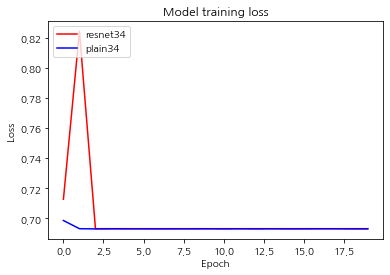

In [22]:
import matplotlib.pyplot as plt
# ÌïôÏäµ loss ÏãúÍ∞ÅÌôî
plt.plot(history_34.history['loss'], 'r')
plt.plot(history_plain_34.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet34', 'plain34'], loc='upper left')
plt.show()

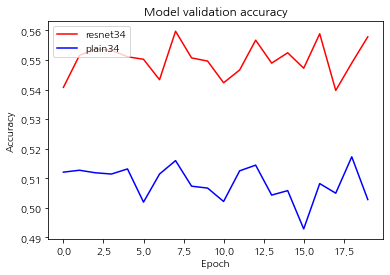

In [23]:
# Í≤ÄÏ¶ù Accuracy ÏãúÍ∞ÅÌôî
plt.plot(history_34.history['val_accuracy'], 'r')
plt.plot(history_plain_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet34', 'plain34'], loc='upper left')
plt.show()

## 3. ResNet-50 VS Plain-50 ÏãúÍ∞ÅÌôî

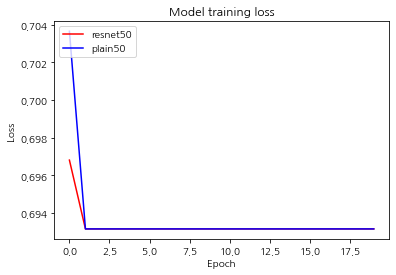

In [24]:
# ÌïôÏäµ loss ÏãúÍ∞ÅÌôî
plt.plot(history_50.history['loss'], 'r')
plt.plot(history_plain_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet50', 'plain50'], loc='upper left')
plt.show()

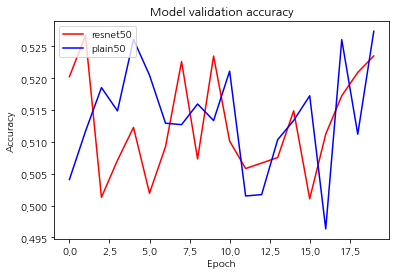

In [25]:
# Í≤ÄÏ¶ù Accuracy ÏãúÍ∞ÅÌôî
plt.plot(history_50.history['val_accuracy'], 'r')
plt.plot(history_plain_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet50', 'plain50'], loc='upper left')
plt.show()

## 4. ResNet-34 VS ResNet-50 ÏãúÍ∞ÅÌôî

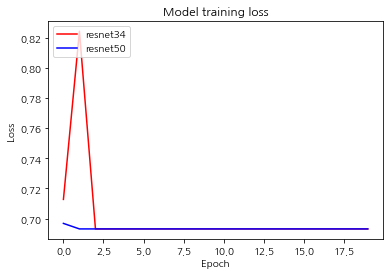

In [26]:
# ÌïôÏäµ loss ÏãúÍ∞ÅÌôî
plt.plot(history_34.history['loss'], 'r')
plt.plot(history_50.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['resnet34', 'resnet50'], loc='upper left')
plt.show()

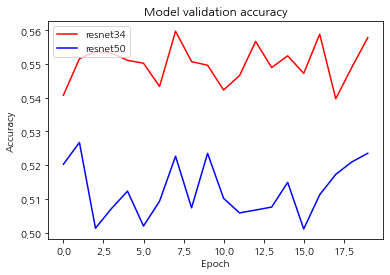

In [27]:
# Í≤ÄÏ¶ù Accuracy ÏãúÍ∞ÅÌôî
plt.plot(history_34.history['val_accuracy'], 'r')
plt.plot(history_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['resnet34', 'resnet50'], loc='upper left')
plt.show()

## 5. Í≤∞Í≥º Ï†ïÎ¶¨

1. ResNet-34 VS Plain-34 ÎπÑÍµê: val accÏùò Í≤ΩÏö∞ ResNet-34Í∞Ä ÎÜíÏïòÎäîÎç∞ ÌäπÏù¥ÌïòÍ≤å train lossÎäî ÎèôÏùºÌñàÎã§.  
2. ResNet-50 Vs Plain-50 ÎπÑÍµê: Îëê Î™®Îç∏Ïùò Í≤ΩÏö∞ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥Î≥¥ÏòÄÎã§.  
3. ResNet-34 VS ResNet-50 ÎπÑÍµê: val accÏùò Í≤ΩÏö∞ ResNet-34Í∞Ä ÎÜíÏïòÎäîÎç∞ ÌäπÏù¥ÌïòÍ≤å train lossÎäî ÎèôÏùºÌñàÎã§.  
4. ResNetÏùò 5Í∞ú layerÏóê ÎåÄÌï¥ Î™®Îç∏ ÏÉùÏÑ±Ìï† Ïàò ÏûàÎäî Ìï®Ïàò ÏûëÏÑ± ÏÑ±Í≥µ.`num_layer`Î•º Ïù¥Ïö©Ìï¥ ÏÉùÏÑ± Í∞ÄÎä•.  
5. Plain Î™®Îç∏ÎèÑ `is-plain`ÏùÑ Ïù¥Ïö©Ìï¥ ÏÉùÏÑ±Ìï† Ïàò ÏûàÎã§.  
6. ÏãúÍ∞ÅÌôî Í≤∞Í≥º: Ïù¥ÏÉÅÌïòÍ≤å train lossÍ∞Ä 0.6931Î°ú ÎèôÏùºÌïòÍ≤å ÎÇòÏò§Îäî Î™®ÏäµÏùÑ ÌôïÏù∏ÌñàÎã§.  

## Î£®Î∏åÎ¶≠

ÏïÑÎûòÏùò Í∏∞Ï§ÄÏùÑ Î∞îÌÉïÏúºÎ°ú ÌîÑÎ°úÏ†ùÌä∏Î•º ÌèâÍ∞ÄÌï©ÎãàÎã§.

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:---:|:---:|
|1. ResNet-34, ResNet-50 Î™®Îç∏ Íµ¨ÌòÑÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?|Î∏îÎ°ùÌï®Ïàò Íµ¨ÌòÑÏù¥ Ï†úÎåÄÎ°ú ÏßÑÌñâÎêòÏóàÏúºÎ©∞ Íµ¨ÌòÑÌïú Î™®Îç∏Ïùò summaryÍ∞Ä ÏòàÏÉÅÎêú ÌòïÌÉúÎ°ú Ï∂úÎ†•ÎêòÏóàÎã§.|
|2. Íµ¨ÌòÑÌïú ResNet Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Image Classification Î™®Îç∏ ÌõàÎ†®Ïù¥ Í∞ÄÎä•ÌïúÍ∞Ä?|cats_vs_dogs Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÏãú Î™á epochÎèôÏïà ÏïàÏ†ïÏ†ÅÏúºÎ°ú loss Í∞êÏÜåÍ∞Ä ÏßÑÌñâ ÌôïÏù∏ÎêòÏóàÎã§.|
|3. Ablation Study Í≤∞Í≥ºÍ∞Ä Î∞îÎ•∏ Ìè¨Îß∑ÏúºÎ°ú Ï†úÏ∂úÎêòÏóàÎäîÍ∞Ä?|ResNet-34, ResNet-50 Í∞ÅÍ∞Å plainÎ™®Îç∏Í≥º residualÎ™®Îç∏ÏùÑ ÎèôÏùºÌïú epochÎßåÌÅº ÌïôÏäµÏãúÏº∞ÏùÑ ÎïåÏùò validation accuracy Í∏∞Ï§ÄÏúºÎ°ú Ablation Study Í≤∞Í≥ºÌëúÍ∞Ä ÏûëÏÑ±ÎêòÏóàÎã§.|
